## Simple Polynomial Regression 
## [Engine Size, Cylinders, Fuel Consumption vs CO2 Emmisions]

### Import Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### Download dataset

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load data

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Explore data

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Select Features

In [5]:
cdf = df[['ENGINESIZE','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


### Plot a scatter plots to observe the relationship between X and Y

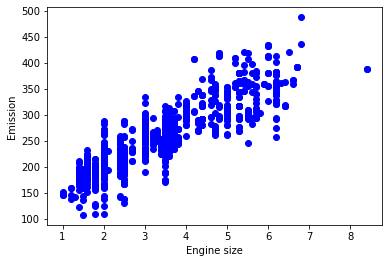

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

The relationship appears to be a curved line

### Splitting dataset into train (80%) and split

In [7]:
mask = np.random.rand(len(cdf)) < 0.8
train = cdf[mask]
test = cdf[~mask]

### Model: Simple Polynomial Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Prep Train and Test data

In [9]:
trainX = np.asanyarray(train[['ENGINESIZE']])
trainY = np.asanyarray(train[['CO2EMISSIONS']])

testX = np.asanyarray(test[['ENGINESIZE']])
testY = np.asanyarray(test[['CO2EMISSIONS']])

Convert original features into linear features using PolynomialFeatures()

In [10]:
poly = PolynomialFeatures(degree=2)

Transform features

In [11]:
trainX_Poly = poly.fit_transform(trainX)
testX_Poly = poly.fit_transform(testX)

Now use linear regression on the transformed features

In [12]:
regression = LinearRegression()
trainY_ = regression.fit(trainX_Poly, trainY)

### Print Results

In [13]:
print(f'Coefficients: {regression.coef_}')
print(f'Intercept: {regression.intercept_}')

Coefficients: [[ 0.         47.96141078 -1.24087909]]
Intercept: [111.71420132]


### Plot Results

Text(0, 0.5, 'Emission')

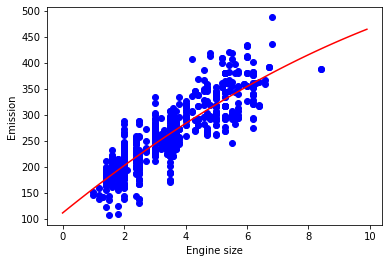

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regression.intercept_[0]+ regression.coef_[0][1]*XX+ regression.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation

In [15]:
from sklearn.metrics import r2_score

testY_ = regression.predict(testX_Poly)

print(f'Mean Absolute Error (MAE): {np.mean(np.absolute(testY_ - testY))}')
print(f'Residual sum of squares (MSE): {np.mean((testY_ - testY) ** 2)}')
print(f'R2-score: {r2_score(testY, testY_)}')

Mean Absolute Error (MAE): 23.85808120971163
Residual sum of squares (MSE): 995.4904378056871
R2-score: 0.7633115704300593


### Pickling

In [16]:
from pickle import dump

with open('plrCO2Emissions.pkl', 'wb') as f:
    dump(regression, f)
